In [1]:
import cv2 as cv
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from matplotlib import image
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [16]:
batch_size = 32
num_classes = 2
epochs = 20
X = []
y = []

In [3]:
worms = np.array([np.asarray(cv.imread(f"./ZZZ Copy/Worm/{image}",0) )for image in os.listdir('./ZZZ Copy/Worm')])
noworms = np.array([np.asarray(cv.imread(f"./ZZZ Copy/NoWorm/{image}",0) )for image in os.listdir('./ZZZ Copy/NoWorm')])
worms_label = np.array([1 for x in worms])
noworms_label = np.array([0 for x in noworms])

In [4]:
data = np.concatenate((worms, noworms))
labels = np.concatenate((worms_label, noworms_label))

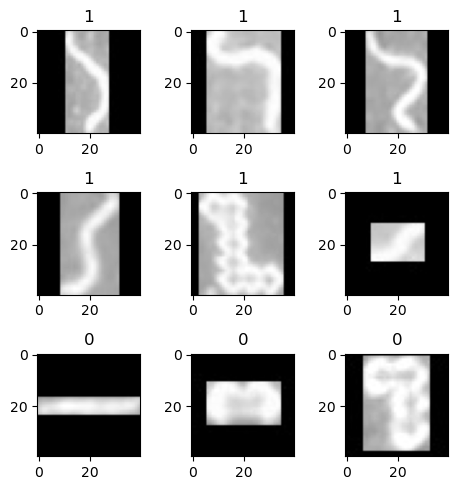

In [5]:
plt.figure(figsize = (5,5), dpi = 100)
for i in range(9):
    x = np.random.randint(0,len(data)-1)
    plt.subplot(3,3,i+1)
    plt.imshow(data[x].reshape(40,40), cmap= 'gray')
    plt.title(labels[x])
    plt.tight_layout()
    plt.savefig('triplet.png')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle = True, test_size = 0.2)

In [7]:
X_train.shape

(16000, 40, 40)

In [8]:
y_test = to_categorical(y_test, num_classes)
y_train = to_categorical(y_train, num_classes)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
h,w = X_train[0].shape

In [11]:
X_train = X_train.reshape(len(X_train), h,w,1)
X_test = X_test.reshape(len(X_test), h,w,1)

In [12]:
print(X_train.shape)
print(X_test.shape)

(16000, 40, 40, 1)
(4000, 40, 40, 1)


In [13]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3),activation='relu', input_shape =(h,w,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 16000 samples, validate on 4000 samples
Epoch 1/20
16000/16000 [==============================] - 8s 525us/step - loss: 0.4097 - accuracy: 0.8218 - val_loss: 0.3500 - val_accuracy: 0.8555
Epoch 2/20
16000/16000 [==============================] - 9s 532us/step - loss: 0.3468 - accuracy: 0.8539 - val_loss: 0.3450 - val_accuracy: 0.8468
Epoch 3/20
16000/16000 [==============================] - 9s 549us/step - loss: 0.3057 - accuracy: 0.8717 - val_loss: 0.2892 - val_accuracy: 0.8723
Epoch 4/20
16000/16000 [==============================] - 8s 518us/step - loss: 0.2970 - accuracy: 0.8796 - val_loss: 0.2809 - val_accuracy: 0.8842
Epoch 5/20
16000/16000 [==============================] - 8s 523us/step - loss: 0.2727 - accuracy: 0.8879 - val_loss: 0.2687 - val_accuracy: 0.8888
Epoch 6/20
16000/16000 [==============================] - 8s 523us/step - loss: 0.2586 - accuracy: 0.8944 - val_loss: 0.2978 - val_accuracy: 0.8723
Epoch 7/20
16000/16000 [==============================] - 9s 58

In [177]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 38, 38, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 19, 19, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2888)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                92448     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 92,594
Trainable params: 92,594
Non-trainable params: 0
_________________________________________________________________


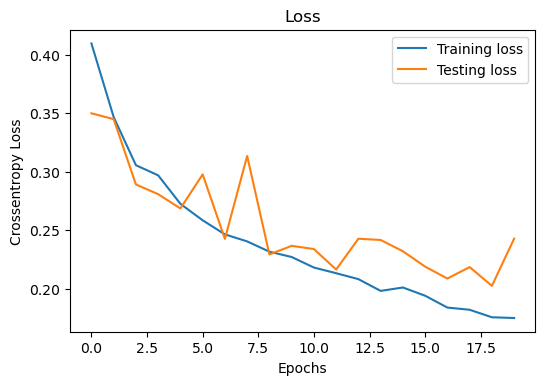

In [18]:
plt.figure(dpi = 100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Crossentropy Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Testing loss'], loc='upper right')
plt.savefig('loss.png')
plt.show()

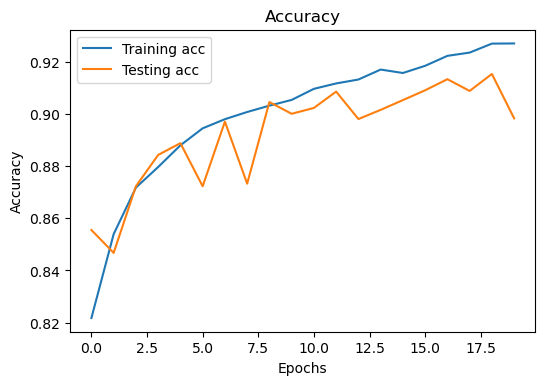

In [20]:
plt.figure(dpi = 100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training acc', 'Testing acc'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()


[0. 1.]


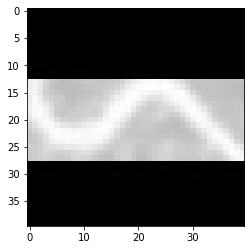

In [36]:
ra = np.random.randint(0, len(X_test)-1)
plt.imshow(X_test[ra].reshape(40,40), cmap ='gray')
print(y_test[ra])

In [37]:
model.predict_classes(X_test[ra].reshape(1,40,40,1))

array([0], dtype=int64)